Plot average  movie length (based on IMDB data) in world map
======

In [1]:
import pandas as pd
# import plotly.plotly as py
from matplotlib import pyplot as plt
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

In [2]:
geo_f = '../data/google_coordinates.tsv'
geo_pd = pd.read_csv(geo_f, sep='\t', index_col='name', comment='#')
geo_pd.head(3)

,country,latitude,longitude
name,,,
Andorra,AD,42.546245,1.601554
United Arab Emirates,AE,23.424076,53.847818
Afghanistan,AF,33.939110,67.709953


In [3]:
imdb_f = '../results/country_runtime_count.tsv'
imdb_pd = pd.read_csv(imdb_f, sep='\t', index_col='countries_first', comment='#')
imdb_pd.head(3)

,running_times_first,kind
countries_first,,
Algeria,1.634103,65
Argentina,1.460100,2439
Armenia,1.526537,103


In [4]:
merged_pd = pd.concat([imdb_pd, geo_pd], axis=1, join_axes=[imdb_pd.index])
merged_pd.head(3)

,running_times_first,kind,country,latitude,longitude
countries_first,,,,,
Algeria,1.634103,65,DZ,28.033886,1.659626
Argentina,1.460100,2439,AR,-38.416097,-63.616672
Armenia,1.526537,103,AM,40.069099,45.038189


In [5]:
merged_pd[merged_pd['latitude'].isnull()]

,running_times_first,kind,country,latitude,longitude
countries_first,,,,,
Federal Republic of Yugoslavia,1.635569,82,NaN,NaN,NaN
Occupied Palestinian Territory,1.423856,51,NaN,NaN,NaN
Soviet Union,1.612674,192,NaN,NaN,NaN


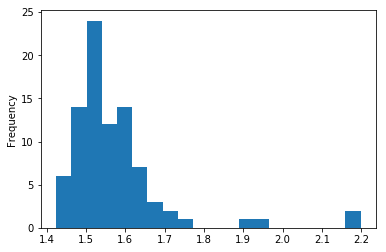

In [6]:
merged_pd['running_times_first'].plot.hist(bins=20)

In [7]:
# color_code = ['#d7191c','#fdae61','#abd9e9','#2c7bb6']
# color_code = ['#d7191c','#fdae61','#28bfa5','#2c7bb6']
color_code = ['#d7191c','#fdae61','#8a5cd1','#2c7bb6']

In [8]:
time_range = [(1.4, 1.6), (1.6, 1.8), (1.8, 2.0), (2.0, 2.2)]


def get_color_code(num):
    for i, pair in enumerate(time_range):
        if pair[0] <= num < pair[1]:
#             return color_code[i]
            return color_code[-i-1]
            break

In [9]:
legend_name_dict = {color: '%s hr' % ' - '.join(str(x)  for x in time_range[-index-1])   
                    for index, color in enumerate(color_code)}
legend_name_dict

{'#2c7bb6': '1.4 - 1.6 hr',
 '#8a5cd1': '1.6 - 1.8 hr',
 '#d7191c': '2.0 - 2.2 hr',
 '#fdae61': '1.8 - 2.0 hr'}

In [10]:
data = []
legend_colors_already_added = []
legend_index = 4
for i, row in merged_pd.iterrows():
    # for proper ordering of legends
    color = get_color_code(row['running_times_first'])
    if color not in legend_colors_already_added \
        and color_code[-legend_index] == color:
        print (legend_index, color)
        legend_colors_already_added.append(color)
        legend_name = legend_name_dict[color]
        showlegend = True
        legend_index -= 1
    else:
        legend_name = None
        showlegend = False
                           
    city = dict(
            type = 'scattergeo',
            lon = pd.Series({i:row['longitude']}),
            lat = pd.Series({i:row['latitude']}),
#             locationmode = "country names",
            text = '%s (%0.1fhr)' % (row.name, row['running_times_first']),
            hoverinfo = 'lon+lat+text',

            marker = dict(
                size = 6,
                color = color,
#                 line = dict(width=0.5, color='rgb(40,40,40)'),
                sizemode = 'area'
        ),
        name = legend_name,
        showlegend = showlegend)
#         name = row.name )
#     print(row['running_times_first'], int(-(row['running_times_first']-1.4)*10))
    data.append(city)

4 #d7191c
3 #fdae61
2 #8a5cd1
1 #2c7bb6


In [11]:
layout = dict(
        title = 'Average movie run-time by country',
#         showlegend = False,
        width = 1000,
        height = 500,
        geo = dict(
            projection=dict(type='natural earth'),
            showland = True,
            showcountries=True,
            countrywidth=0.1,
            landcolor = '#292727',
            countrycolor="rgb(255, 255, 255)"
        ),
        margin=Margin(r=0, l=10,
                  b=0, t=30, pad=0),
        legend=dict(x=0.95,
                   font=dict(size=15))
    )

fig = dict( data=data, layout=layout )
# py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )
# py.iplot( fig)
iplot(fig)

#### Plot version 2

In [12]:
merged_pd.head()

,running_times_first,kind,country,latitude,longitude
countries_first,,,,,
Algeria,1.634103,65,DZ,28.033886,1.659626
Argentina,1.460100,2439,AR,-38.416097,-63.616672
Armenia,1.526537,103,AM,40.069099,45.038189
Australia,1.528642,1968,AU,-25.274398,133.775136
Austria,1.531030,926,AT,47.516231,14.550072


In [13]:
merged_pd['color_code'] = merged_pd['running_times_first'].apply(get_color_code)
merged_pd.head()

,running_times_first,kind,country,latitude,longitude,color_code
countries_first,,,,,,
Algeria,1.634103,65,DZ,28.033886,1.659626,#8a5cd1
Argentina,1.460100,2439,AR,-38.416097,-63.616672,#2c7bb6
Armenia,1.526537,103,AM,40.069099,45.038189,#2c7bb6
Australia,1.528642,1968,AU,-25.274398,133.775136,#2c7bb6
Austria,1.531030,926,AT,47.516231,14.550072,#2c7bb6


In [14]:
slim3_pd = pd.read_csv('../data/all_geo.csv', index_col='alpha-2')
slim3_pd.head()

,name,alpha-3,country-code,iso_3166-2,region,sub-region,region-code,sub-region-code
alpha-2,,,,,,,,
AF,Afghanistan,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
AX,Åland Islands,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
AL,Albania,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
DZ,Algeria,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
AS,American Samoa,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [15]:
df = merged_pd.copy()
df.reset_index(inplace=True)
df.set_index('country', inplace=True)
df.head()

,countries_first,running_times_first,kind,latitude,longitude,color_code
country,,,,,,
DZ,Algeria,1.634103,65,28.033886,1.659626,#8a5cd1
AR,Argentina,1.460100,2439,-38.416097,-63.616672,#2c7bb6
AM,Armenia,1.526537,103,40.069099,45.038189,#2c7bb6
AU,Australia,1.528642,1968,-25.274398,133.775136,#2c7bb6
AT,Austria,1.531030,926,47.516231,14.550072,#2c7bb6


In [16]:
m_pd = pd.concat([df, slim3_pd], axis=1, join_axes=[df.index])
m_pd.head()

,countries_first,running_times_first,kind,latitude,longitude,color_code,name,alpha-3,country-code,iso_3166-2,region,sub-region,region-code,sub-region-code
country,,,,,,,,,,,,,,
DZ,Algeria,1.634103,65,28.033886,1.659626,#8a5cd1,Algeria,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
AR,Argentina,1.460100,2439,-38.416097,-63.616672,#2c7bb6,Argentina,ARG,32,ISO 3166-2:AR,Americas,South America,19.0,5.0
AM,Armenia,1.526537,103,40.069099,45.038189,#2c7bb6,Armenia,ARM,51,ISO 3166-2:AM,Asia,Western Asia,142.0,145.0
AU,Australia,1.528642,1968,-25.274398,133.775136,#2c7bb6,Australia,AUS,36,ISO 3166-2:AU,Oceania,Australia and New Zealand,9.0,53.0
AT,Austria,1.531030,926,47.516231,14.550072,#2c7bb6,Austria,AUT,40,ISO 3166-2:AT,Europe,Western Europe,150.0,155.0


In [25]:
data = [ dict(
        type = 'choropleth',
        locations = m_pd['alpha-3'],
        z = m_pd['running_times_first'],
            zmin = 1.4,
            zmax = 2.2,
        text = m_pd['name'] + '<br>' + m_pd['running_times_first'].round(2).astype(str) + ' hr',
        name = '',
        hoverinfo = 'text',
        hoverlabel = dict(bgcolor='gray',
                         font = dict(color='black')),
        colorscale = 'Portland',
#         reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            title = 'Hours',
            titleside='bottom',
            x=0.95,
            nticks=5
        ),
      ) ]

layout = dict(
    title = ('Average Length of Movies by Country<br>(Only countries with >50 movies in 1991-2017)<br>Source: IMDB. Created by manag'),
            margin=Margin(r=60, l=10,
                          b=30, t=100),
    geo = dict(
        showcountries = True,
        countrywidth=0.5,
        countrycolor = '#bdbdbd',
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot( fig)